In [1]:
import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [4]:
datat = pd.read_csv('train_tweets.csv')
data= pd.read_csv('test_tweets.csv')

In [5]:
datat.head(n=10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [ ]:
datat.isnull().sum()

In [6]:
datat['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

<BarContainer object of 2 artists>

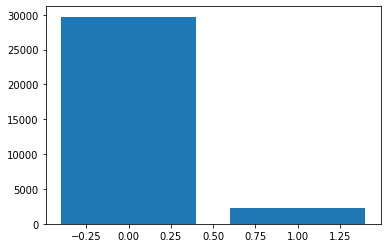

In [7]:
import matplotlib.pyplot as plt
plt.bar(datat['label'].value_counts().index, datat['label'].value_counts().values)

## Training Data Creation

In [8]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords')

sentences=[]
for i in range(0, datat.shape[0]):
    review= re.sub('[^a-zA-Z]', ' ', datat["tweet"][i])
    review= review.lower()
    review= review.split()
    review=[word for word in review if not word in set(stopwords.words('english'))]
    ps= PorterStemmer()
    review =[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review=' '.join(review)
    sentences.append(review)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
y_unsampled = np.array(datat['label'])
num_words = 40000
tokenizer = Tokenizer(num_words=num_words)
train_tokens = tokenizer.fit_on_texts(sentences)
dict_word = tokenizer.index_word

vocab_size = len(dict_word.keys())
max_length = 40

seq = tokenizer.texts_to_sequences(sentences)
padded_data = pad_sequences(seq, padding="post", maxlen = max_length)

In [ ]:
sampled_data['Label'].value_counts()

1.0    1430
0.0    1429
Name: Label, dtype: int64

In [ ]:
y_train_sampled = sampled_data.pop('Label')
padded_sampled = sampled_data.to_numpy()

## Modeling


In [14]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, GlobalAveragePooling1D
import tensorflow as tf

class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs['val_accuracy']>0.95:
      self.model.stop_training = True

callback = myCallBack()

In [ ]:
class myCallBack(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs['val_accuracy']>0.95:
      self.model.stop_training = True

callback = myCallBack()
model= Sequential()
model.add(Embedding(vocab_size,output_dim=100, input_length = 40))
model.add(GlobalAveragePooling1D())
model.add(Dense(units=50, activation='sigmoid', kernel_initializer='random_uniform'))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='random_uniform'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(padded_sampled, y_train, epochs=50, validation_data = (padded_vad, y_vad), callbacks=[callback])

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 2574 samples, validate on 285 samples
Epoch 1/50
2574/2574 [==============================] - 3s 1ms/step - loss: 0.6940 - accuracy: 0.4977 - val_loss: 0.6924 - val_accuracy: 0.5193
Epoch 2/50
2574/2574 [==============================] - 3s 1ms/step - loss: 0.6940 - accuracy: 0.5109 - val_loss: 0.6938 - val_accuracy: 0.4807
Epoch 3/50
2574/2574 [==============================] - 3s 1ms/step - loss: 0.6934 - accuracy: 0.4969 - val_loss: 0.6938 - val_accuracy: 0.4807
Epoch 4/50
2574/2574 [==============================] - 3s 1ms/step - loss: 0.6933 - accuracy: 0.4992 - val_loss: 0.6982 - val_accuracy: 0.4807
Epoch 5/50
2574/2574 [==============================] - 3s 1ms/step - loss: 0.6912 - accuracy: 0.5190 - val_loss: 0.6944 - val_accuracy: 0.4667
Epoch 6/50
2574/2574 [==============================] - 3s 1ms/step - loss: 0.6824 - accuracy: 0.6402 - val_loss: 0.6958 - val_accuracy: 0.4772
Epoch 7/50
2574/2574 [==============================] - 3s 1ms/step - loss: 0.6541 - accu

## Over Sampling

In [15]:
from imblearn.over_sampling import SMOTE
oversampling = SMOTE()
padded_oversampled, y_train_oversampled = oversampling.fit_resample(padded_data, y_unsampled)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [16]:
padded_oversampled.shape

(59440, 40)

In [17]:
y_train_oversampled.shape

(59440,)

In [18]:
pd.Series(y_train_oversampled).value_counts()

1    29720
0    29720
dtype: int64

In [19]:
valid_perc = 0.2
len_valid = int(0.1*(padded_oversampled.shape[0]))
padded_vad = padded_oversampled[:len_valid]
y_vad = y_train_oversampled[:len_valid]


y_train_oversampled = y_train_oversampled[len_valid:]
padded_oversampled = padded_oversampled[len_valid:]

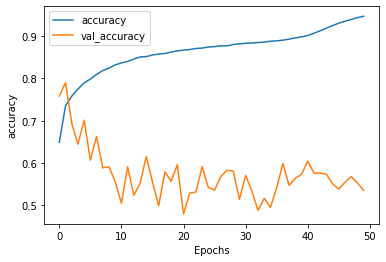

In [ ]:
def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
plot_graph(history, "accuracy")

In [21]:
padded_oversampled, y_train_oversampled = oversampling.fit_resample(padded_data, y_unsampled)

model= Sequential()
model.add(Embedding(40000,output_dim=100, input_length = 40))
model.add(GlobalAveragePooling1D())
model.add(Dense(units=50, activation='relu', kernel_initializer='random_uniform'))
model.add(Dense(units=1, activation='sigmoid', kernel_initializer='random_uniform'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(padded_oversampled, y_train_oversampled, epochs=5)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
59440/59440 [==============================] - 95s 2ms/step - loss: 0.6932 - accuracy: 0.4974
Epoch 2/5
59440/59440 [==============================] - 94s 2ms/step - loss: 0.6903 - accuracy: 0.5058
Epoch 3/5
59440/59440 [==============================] - 93s 2ms/step - loss: 0.5631 - accuracy: 0.7053
Epoch 4/5
59440/59440 [==============================] - 93s 2ms/step - loss: 0.4600 - accuracy: 0.7823
Epoch 5/5
59440/59440 [==============================] - 93s 2ms/step - loss: 0.3702 - accuracy: 0.8328


In [27]:
model.save("Embedding_model_final.h5")

In [23]:
padded_oversampled[0].flatten().shape

(40,)

In [24]:
model.predict(padded_oversampled[0:1])

array([[0.24713838]], dtype=float32)

In [25]:
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [26]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
nltk.download('stopwords')


def predict_on_string(string, model_file, tokenizer_file):
  model = tf.keras.models.load_model(model_file)
  with open(tokenizer_file, 'rb') as handle:
    tokenizer = pickle.load(handle)
  review= re.sub('[^a-zA-Z]', ' ', string)

  review= review.lower()
  review= review.split()
  review=[word for word in review if not word in set(stopwords.words('english'))]
  ps= PorterStemmer()
  review =[ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  review=' '.join(review)
  
  seq = tokenizer.texts_to_sequences([review])
  padded_data = pad_sequences(seq, padding="post", maxlen = 40)
  return model.predict(padded_data)

#Add atleast 7-10 words to see good results. This makes sense since Tweets are generally longer than 20 words
predict_on_string("This isnt as good as I expected it to be but I think its highly unacceptable to not try harder", "Embedding_model_final.h5", "tokenizer.pickle")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


array([[0.8478688]], dtype=float32)